<a href="https://colab.research.google.com/github/elsy-torres/script/blob/main/TF-intento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRANSFORMADA DE UN SISMOGRAMA
## Los datos fueron proporcionados por el Dr. Chang 2020.

#Importar librerías

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
from scipy import fftpack

# Cargar datos de un txt


In [65]:
data=pd.read_csv('NZ007.txt',names=['time','amp'],skiprows=3,sep='\s+',engine='python')
data.head(10)

,time,amp
0,0.00,-0.244690
1,0.02,0.055570
2,0.04,0.034080
3,0.06,-0.035078
4,0.08,0.065622
5,0.10,0.045962
6,0.12,0.007326
7,0.14,-0.012271
8,0.16,-0.046718
9,0.18,-0.049188


In [66]:
data.tail()


,time,amp
16443,328.86,0.72716
16444,328.88,0.61736
16445,328.90,0.54991
16446,328.92,0.59976
16447,328.94,0.41080


In [67]:
print(len(data))

16448


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16448 entries, 0 to 16447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    16448 non-null  float64
 1   amp     16448 non-null  float64
dtypes: float64(2)
memory usage: 257.1 KB


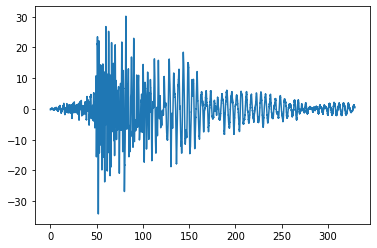

In [69]:
plt.plot(data['time'],data['amp'])
_=plt.show()

# Declarar el vector x en el dominio de la frecuencia

In [90]:
fo=1/328.94
#data['W']=2*np.pi*data['freq']
y=np.arange(0,len(data)/2*fo,step=fo)
data['freq']=np.arange(0,len(data)*fo,step=fo)
print(data)

         time       amp  ...        asb          fase
0        0.00 -0.244690  ...  13.838794 -1.026885e-15
1        0.02  0.055570  ...  48.436642  4.764827e-01
2        0.04  0.034080  ...  29.586347  1.465820e+00
3        0.06 -0.035078  ...  59.707817  1.167415e+00
4        0.08  0.065622  ...  43.373308 -1.020299e+00
...       ...       ...  ...        ...           ...
16443  328.86  0.727160  ...  59.561601  1.505522e+00
16444  328.88  0.617360  ...  43.373308  1.020299e+00
16445  328.90  0.549910  ...  59.707817 -1.167415e+00
16446  328.92  0.599760  ...  29.586347 -1.465820e+00
16447  328.94  0.410800  ...  48.436642 -4.764827e-01

[16448 rows x 8 columns]


# Aplicar un filtro a la serie de tiempo antes de realizar la FT


In [71]:
AMP=data['amp']
print(AMP)


0       -0.244690
1        0.055570
2        0.034080
3       -0.035078
4        0.065622
           ...   
16443    0.727160
16444    0.617360
16445    0.549910
16446    0.599760
16447    0.410800
Name: amp, Length: 16448, dtype: float64


In [72]:
window=signal.hamming(len(AMP))
print(window)

[0.08       0.08000003 0.08000013 ... 0.08000013 0.08000003 0.08      ]


In [73]:
#ata=data.drop('filtro1',axis=1)

In [74]:
data['filtro']=1
data

,time,amp,freq,filtro
0,0.00,-0.244690,0.00000,1
1,0.02,0.055570,0.00304,1
2,0.04,0.034080,0.00608,1
3,0.06,-0.035078,0.00912,1
4,0.08,0.065622,0.01216,1
...,...,...,...,...
16443,328.86,0.727160,49.98784,1
16444,328.88,0.617360,49.99088,1
16445,328.90,0.549910,49.99392,1
16446,328.92,0.599760,49.99696,1


In [95]:
data['filtro'].iloc[data.index<3000]=signal.cosine(3000)
data['filtro'].iloc[data.index>13447]=signal.cosine(3000)
data.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,time,amp,freq,filtro,signal_filter,fft,asb,fase
16443,328.86,0.72716,49.98784,0.004712,0.010280,-3.885055-59.434760j,59.561601,1.505522
16444,328.88,0.61736,49.99088,0.003665,0.006788,-22.689074-36.965522j,43.373308,1.020299
16445,328.90,0.54991,49.99392,0.002618,0.004319,23.437134-54.915609j,59.707817,-1.167415
16446,328.92,0.59976,49.99696,0.001571,0.002826,3.100171-29.423475j,29.586347,-1.465820
16447,328.94,0.41080,50.00000,0.000524,0.000645,43.041462-22.215780j,48.436642,-0.476483


In [96]:
data['signal_filter']= data['filtro']*data['amp']

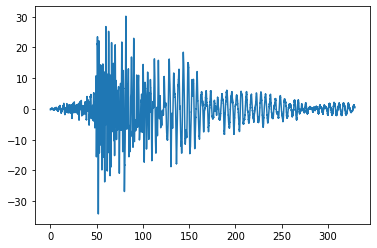

In [97]:
plt.plot(data['time'],data['amp'])

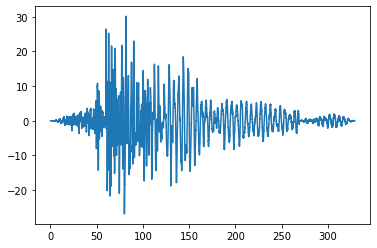

In [98]:
plt.plot(data['time'],data['signal_filter'])

# Realizar FT

In [99]:
data['fft']=np.fft.fft(data['signal_filter'])
data.head(5)

,time,amp,freq,filtro,signal_filter,fft,asb,fase
0,0.00,-0.244690,0.00000,0.000524,-0.000128,119.797147-0.000000j,13.838794,-1.026885e-15
1,0.02,0.055570,0.00304,0.001571,0.000087,74.820522-19.001879j,48.436642,4.764827e-01
2,0.04,0.034080,0.00608,0.002618,0.000089,-102.139290-30.503887j,29.586347,1.465820e+00
3,0.06,-0.035078,0.00912,0.003665,-0.000129,-120.635955+5.622811j,59.707817,1.167415e+00
4,0.08,0.065622,0.01216,0.004712,0.000309,-51.648943+11.915675j,43.373308,-1.020299e+00


# Calcular la amplitud de la TF

In [100]:
data['asb']= np.abs(data['fft'])
data.head(5)

,time,amp,freq,filtro,signal_filter,fft,asb,fase
0,0.00,-0.244690,0.00000,0.000524,-0.000128,119.797147-0.000000j,119.797147,-1.026885e-15
1,0.02,0.055570,0.00304,0.001571,0.000087,74.820522-19.001879j,77.195738,4.764827e-01
2,0.04,0.034080,0.00608,0.002618,0.000089,-102.139290-30.503887j,106.597006,1.465820e+00
3,0.06,-0.035078,0.00912,0.003665,-0.000129,-120.635955+5.622811j,120.766923,1.167415e+00
4,0.08,0.065622,0.01216,0.004712,0.000309,-51.648943+11.915675j,53.005628,-1.020299e+00


# Calcular la fase de la TF

In [81]:
#data['fase'].iloc[0]=0

In [101]:
data['fase']=np.arctan(data['fft'].values.imag/data['fft'].values.real)
data.head(5)

,time,amp,freq,filtro,signal_filter,fft,asb,fase
0,0.00,-0.244690,0.00000,0.000524,-0.000128,119.797147-0.000000j,119.797147,-2.075926e-15
1,0.02,0.055570,0.00304,0.001571,0.000087,74.820522-19.001879j,77.195738,-2.487080e-01
2,0.04,0.034080,0.00608,0.002618,0.000089,-102.139290-30.503887j,106.597006,2.902177e-01
3,0.06,-0.035078,0.00912,0.003665,-0.000129,-120.635955+5.622811j,120.766923,-4.657603e-02
4,0.08,0.065622,0.01216,0.004712,0.000309,-51.648943+11.915675j,53.005628,-2.267380e-01


In [83]:
data.tail()

,time,amp,freq,filtro,signal_filter,fft,asb,fase
16443,328.86,0.72716,49.98784,0.014137,0.010280,-3.885055-59.434760j,59.561601,1.505522
16444,328.88,0.61736,49.99088,0.010995,0.006788,-22.689074-36.965522j,43.373308,1.020299
16445,328.90,0.54991,49.99392,0.007854,0.004319,23.437134-54.915609j,59.707817,-1.167415
16446,328.92,0.59976,49.99696,0.004712,0.002826,3.100171-29.423475j,29.586347,-1.465820
16447,328.94,0.41080,50.00000,0.001571,0.000645,43.041462-22.215780j,48.436642,-0.476483


# Señal en el dominio del tiempo

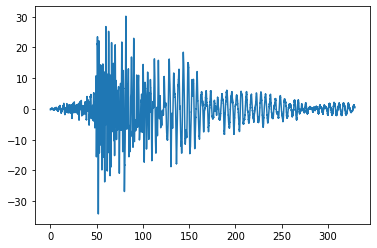

In [84]:
plt.plot(data['time'],data['amp'])

# Señal en el dominio de la frecuencia 

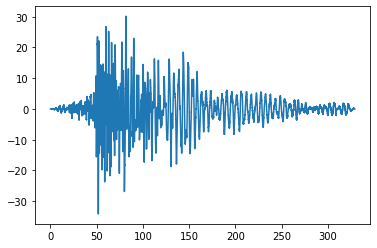

In [85]:
plt.plot(data['time'],data['signal_filter'])

# Espectro de Amplitud

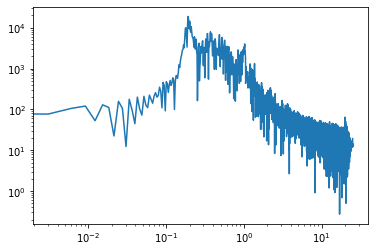

In [102]:
plt.loglog(data['freq'].iloc[0:8224],data['asb'].iloc[0:8224])

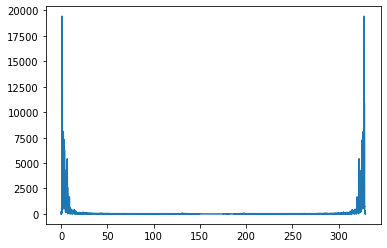

In [87]:
plt.plot(data['time'],data['asb'])

# Espectro de Fase

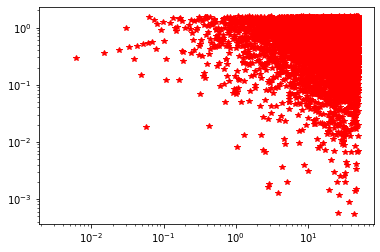

In [103]:
plt.loglog(data['freq'],data['fase'],'r*')

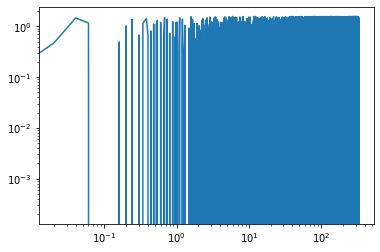

In [89]:
plt.loglog(data['time'],data['fase'])